# Risco em Aprendizado de Máquina

A aprendizagem de máquina é um campo que busca construir modelos eficientes a partir de dados. A eficácia de um modelo é essencial para garantir previsões precisas e confiáveis. Mas como podemos determinar se um modelo é 'bom'? O que exatamente significa um modelo 'bom'?

Essas perguntas nos levam aos conceitos de **risco empírico** e **risco estrutural**, que são fundamentais para avaliar o desempenho dos modelos de aprendizado de máquina.

## Risco Empírico vs. Risco Estrutural

- **Risco Empírico:**
  Este é o erro observado nos dados de treinamento. Ele indica quão bem o modelo está se ajustando aos dados com os quais foi treinado, sendo uma medida do erro de treinamento. Por exemplo, se tivermos um modelo de regressão que apresenta um risco empírico alto, isso significa que ele não está se ajustando bem aos dados de treinamento (Underfitting), podendo ser necessário revisar suas características ou parâmetros.


- **Risco Estrutural:**
  Este conceito é mais abstrato. Refere-se ao erro que esperamos ver em novos dados, ou seja, o erro em um conjunto de dados que o modelo nunca viu antes. Ele nos dá uma ideia da capacidade de generalização do modelo, sendo uma medida do erro de teste ou validação. Um modelo com baixo risco estrutural é capaz de fazer previsões precisas em dados não vistos anteriormente.

## A Importância do Equilíbrio

É crucial encontrar um equilíbrio entre o risco empírico e o risco estrutural. Se um modelo se ajusta perfeitamente aos dados de treinamento (risco empírico baixo), mas não generaliza bem para novos dados (risco estrutural alto), ele é considerado sobreajustado (overfitting). Por outro lado, um modelo que não se ajusta bem nem aos dados de treinamento pode estar subajustado (underfitting), indicando que pode ser muito simples para capturar a complexidade dos dados.

## Exemplo Prático

Imagine um modelo de classificação de e-mails em 'spam' ou 'não spam'. Se o modelo tem um risco empírico baixo, ele classifica corretamente a maioria dos e-mails no conjunto de treinamento. No entanto, se ele tem um risco estrutural alto, pode falhar ao classificar e-mails novos, marcando e-mails legítimos como spam ou permitindo que spam passe como e-mail legítimo.

## Conclusão

Entender o risco empírico e o risco estrutural é essencial para construir e avaliar modelos de aprendizado de máquina eficazes. Eles nos ajudam a entender os limites do que nossos modelos podem aprender e a encontrar um equilíbrio entre o ajuste aos dados de treinamento e a capacidade de generalização para novos dados.

Link com o datalhamento do dataset: https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('consumo_de_energia.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307392 entries, 0 to 307391
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    307392 non-null  float64
 1   Global_reactive_power  307392 non-null  float64
 2   Voltage                307392 non-null  float64
 3   Global_intensity       307392 non-null  float64
 4   Sub_metering_1         307392 non-null  float64
 5   Sub_metering_2         307392 non-null  float64
 6   Sub_metering_3         307392 non-null  float64
dtypes: float64(7)
memory usage: 16.4 MB


In [4]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,307392.000000,307392.000000,307392.000000,307392.000000,307392.000000,307392.000000,307392.000000
mean,1.094936,0.123738,240.834400,4.641457,1.110836,1.324524,6.495328
std,1.059686,0.112674,3.239736,4.454838,6.116527,5.907391,8.452119
min,0.078000,0.000000,224.420000,0.200000,0.000000,0.000000,0.000000
25%,0.310000,0.048000,238.980000,1.400000,0.000000,0.000000,0.000000
50%,0.608000,0.100000,241.010000,2.600000,0.000000,0.000000,1.000000
75%,1.530000,0.194000,242.880000,6.400000,0.000000,1.000000,17.000000
max,10.650000,1.218000,253.260000,46.400000,82.000000,79.000000,31.000000


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separa os dados em X e y
scaler_X = MinMaxScaler()
X = df.drop('Global_active_power', axis = 1)

scaler_y  = MinMaxScaler()
y = df[['Global_active_power']]

# Separa os dados em X e y de treinamento e temporários
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)

# Normaliza e ajusta o escalonizador com os dados de X de treinamento
X_train = scaler_X.fit_transform(X_train)
# Normaliza e ajusta o escalonizador com os dados de y de treinamento
y_train = scaler_y.fit_transform(y_train)

# Ajusta os dados de X_temp
X_temp = scaler_X.transform(X_temp)
# Ajusta os dados de y_temp
y_temp = scaler_y.transform(y_temp)

# Separa os dados em X e y de validação e teste (70% para teste - 70% de 50% = 35% do total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)

# Risco Empírico

Quando falamos sobre treinar modelos de aprendizado de máquina, muitas vezes estamos tentando minimizar algum tipo de erro. No contexto de regressão, por exemplo, queremos minimizar a diferença entre as previsões do nosso modelo e os valores reais. Esta diferença é muitas vezes referida como "erro". e na maioria dos casos é utilizado o MSE dos dados de treinamento para calcular este erro.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping

# Função para criar o modelo com L1 e L2 (Elastic Net)
def create_l1_l2_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [7]:
# Primeiro, obtemos a dimensão dos dados de entrada.
# 'X.shape[1]' retorna o número de características no conjunto de dados X.
input_shape = X.shape[1]

# Aqui, chamamos a função 'create_l1_l2_model' para criar o modelo.
# Passamos 'input_shape' como argumento para garantir que o modelo saiba quantos neurônios de entrada deve ter.
model = create_l1_l2_model(input_shape)

# Definimos o Early Stopping para o treinamento do modelo.
# 'monitor' é definido como 'val_loss', o que significa que o Early Stopping observará a perda no conjunto de validação.
# 'patience' é definido como 10, o que significa que o treinamento será interrompido se não houver melhoria na perda de validação por 10 épocas consecutivas.
# 'verbose' é definido como 1, o que significa que mensagens de log serão impressas durante o treinamento.
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a ser monitorada
    patience=3,  # Número de épocas sem melhoria após o qual o treinamento será interrompido
    verbose=1,  # Para exibir logs
    mode='min'  # O treinamento será interrompido quando 'val_loss' parar de diminuir
)

# Aqui, iniciamos o treinamento do modelo com o método 'fit'.
# 'X_train' e 'y_train' são os dados de treinamento e os rótulos correspondentes.
# 'epochs' é definido como 20, o que significa que o modelo passará pelos dados de treinamento 20 vezes no máximo.
# 'validation_data' é definido como '(X_val, y_val)', o que significa que o modelo será validado nesse conjunto de dados após cada época.
# 'callbacks' é definido como uma lista contendo 'early_stopping', o que significa que o Early Stopping será usado durante o treinamento.
model.fit(
    X_train, y_train,
    epochs=10,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/10
4803/4803 [==============================] - 16s 3ms/step - loss: 0.0545 - val_loss: 0.0025
Epoch 2/10
4803/4803 [==============================] - 15s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3/10
4803/4803 [==============================] - 15s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 4/10
4803/4803 [==============================] - 14s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 5/10
4803/4803 [==============================] - 14s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 6/10
4803/4803 [==============================] - 14s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 7/10
4803/4803 [==============================] - 15s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 8/10
4803/4803 [==============================] - 17s 4ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 8: early stopping


In [8]:
from sklearn.metrics import mean_squared_error

# Usando o modelo para fazer previsões no conjunto de treinamento
predict = model.predict(X_train)

# Invertendo a normalização das previsões para obter os valores reais
predict = scaler_y.inverse_transform(predict)

# Invertendo a normalização dos valores reais de treinamento
real = scaler_y.inverse_transform(y_train)

# Calculando o Erro Quadrático Médio (MSE) entre os valores reais e as previsões
mse = mean_squared_error(real, predict)

# Imprimindo o MSE
print(f"Risco Empírico (MSE): {mse:.3f}")

4803/4803 [==============================] - 7s 1ms/step
Risco Empírico (MSE): 0.004


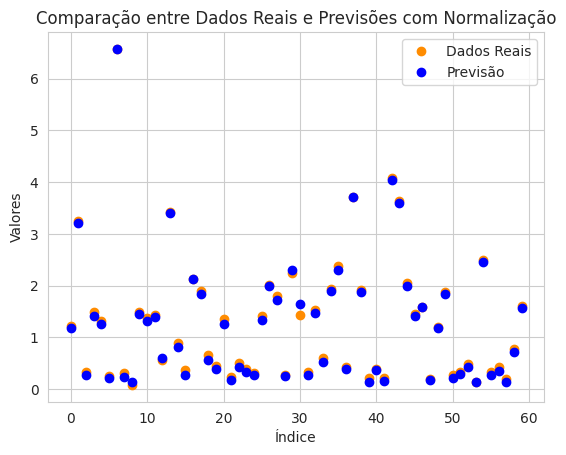

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importando seaborn para melhorar a estética dos gráficos

# Configurando o estilo do gráfico para um estilo mais bonito
sns.set_style("whitegrid")

# Criando um gráfico de linha para os dados reais
# Exibindo apenas os 60 primeiros valores
plt.plot(real[:60], 'o', color="darkorange", label="Dados Reais")

# Criando um gráfico de linha para as previsões
# Exibindo apenas os 60 primeiros valores
plt.plot(predict[:60], 'o', color="blue", label="Previsão")

# Definindo o rótulo do eixo X como 'Índice'
plt.xlabel("Índice")

# Definindo o rótulo do eixo Y como 'Valores'
plt.ylabel("Valores")

# Definindo o título do gráfico
plt.title("Comparação entre Dados Reais e Previsões com Normalização")

# Adicionando a legenda ao gráfico
plt.legend()

# Exibindo o gráfico
plt.show()

Epoch 1/10
4803/4803 [==============================] - 16s 3ms/step - loss: 0.4343 - val_loss: 0.0729
Epoch 2/10
4803/4803 [==============================] - 15s 3ms/step - loss: 0.0240 - val_loss: 0.0081
Epoch 3/10
4803/4803 [==============================] - 15s 3ms/step - loss: 0.0069 - val_loss: 0.0054
Epoch 4/10
4803/4803 [==============================] - 14s 3ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 5/10
4803/4803 [==============================] - 14s 3ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 6/10
4803/4803 [==============================] - 15s 3ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 7/10
4803/4803 [==============================] - 15s 3ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 8/10
4803/4803 [==============================] - 14s 3ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 9/10
4803/4803 [==============================] - 15s 3ms/step - loss: 0.0045 - val_loss: 0.0055
Epoch 10/10
4803/4803 [==============================] - 9s 2ms/step
Risc

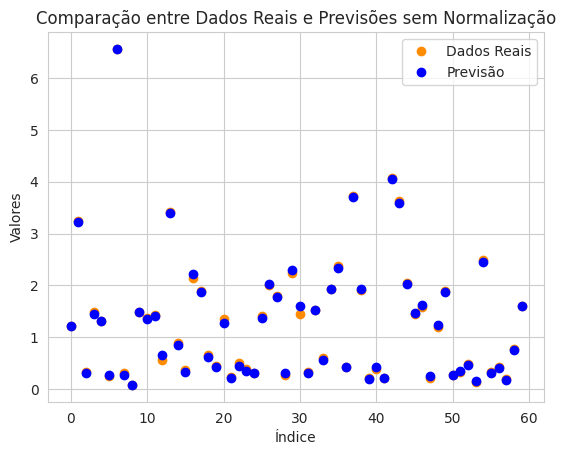

In [10]:
# Mesmo exemplo mas sem normalizar os dados
X = df.drop('Global_active_power', axis = 1)
y = df[['Global_active_power']]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)

input_shape = X.shape[1]

model = create_l1_l2_model(input_shape)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    mode='min'
)

model.fit(
    X_train, y_train,
    epochs=10,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

predict = model.predict(X_train)
mse = mean_squared_error(y_train, predict)
print(f"Risco Empírico (MSE): {mse:.3f}")

sns.set_style("whitegrid")
plt.plot(y_train[:60].values, 'o', color="darkorange", label="Dados Reais")
plt.plot(predict[:60], 'o', color="blue", label="Previsão")
plt.xlabel("Índice")
plt.ylabel("Valores")
plt.title("Comparação entre Dados Reais e Previsões sem Normalização")
plt.legend()
plt.show()

# Overfitting e Underfitting: Entendendo os Conceitos e a Relação com Risco Empírico

## Overfitting e Underfitting: Uma Visão Geral

- **Overfitting (Sobreajuste)**:
  - **O que é?** Ocorre quando um modelo aprende demais dos dados de treinamento, capturando ruído como se fosse um padrão.
  - **Problemas**: Bom desempenho nos dados de treinamento, mas desempenho ruim em dados novos ou não vistos.
  - **Exemplo**: Imagine um estudante que memoriza as questões da prova em vez de entender os conceitos. Ele pode se sair bem em uma prova semelhante, mas falhará em questões que exigem compreensão real.

- **Underfitting (Subajuste)**:
  - **O que é?** Acontece quando um modelo é muito simples, falhando em capturar padrões nos dados.
  - **Problemas**: Desempenho ruim tanto nos dados de treinamento quanto nos dados novos.
  - **Exemplo**: Pense em um estudante que estuda muito pouco e, portanto, não tem conhecimento suficiente para passar na prova.

### Soluções:

- Para **overfitting**, podemos simplificar o modelo, usar técnicas de regularização ou obter mais dados de treinamento.
- Para **underfitting**, podemos tornar o modelo mais complexo ou adicionar mais características relevantes aos dados de entrada.

## Relação com Risco Empírico

- **Risco Empírico e Overfitting**:
  - **Cenário**: Baixo risco empírico, mas alto erro em dados de validação/teste.
  - **Interpretação**: O modelo está memorizando os dados de treinamento, não generalizando bem para dados novos.
  
- **Risco Empírico e Underfitting**:
  - **Cenário**: Alto risco empírico e alto erro em dados de validação/teste.
  - **Interpretação**: O modelo não está aprendendo adequadamente, falhando em capturar padrões essenciais.

## Como Encontrar o Equilíbrio?

- **Validação Cruzada**: Use a validação cruzada para avaliar o desempenho do modelo em diferentes subconjuntos de dados de treinamento.
- **Regularização**: Aplique técnicas de regularização para penalizar modelos complexos.
- **Ajuste de Hiperparâmetros**: Experimente diferentes hiperparâmetros para encontrar a melhor combinação que evite overfitting e underfitting.

# Entendendo a Regularização para Combater o Overfitting

## Introdução à Regularização

A **Regularização** é uma técnica fundamental no aprendizado de máquina para prevenir o overfitting, garantindo que o modelo generalize bem para dados não vistos. É semelhante a um professor que pede para explicar o raciocínio por trás de uma resposta, evitando a mera memorização.

## Por Que a Regularização é Necessária?

- **Prevenção de Overfitting**: Evita que o modelo memorize o ruído dos dados de treinamento.
- **Melhoria da Generalização**: Ajuda o modelo a performar bem em dados não vistos.
- **Redução da Complexidade do Modelo**: Penaliza pesos grandes, levando a modelos mais simples.

## Explorando os Tipos de Regularização

### 1. **L1 (Lasso)**

- **Funcionamento**: Elimina pesos de características irrelevantes, efetivamente selecionando características.
- **Aplicação Prática**: Útil quando há suspeita de muitas características irrelevantes.

### 2. **L2 (Ridge)**

- **Funcionamento**: Penaliza pesos grandes, mas não os elimina completamente.
- **Aplicação Prática**: Útil quando todas as características são relevantes.

### 3. **Elastic Net**

- **Funcionamento**: Combina L1 e L2, proporcionando um equilíbrio entre a seleção de características e a penalização de pesos grandes.
- **Aplicação Prática**: Útil quando há incerteza sobre a relevância das características.

## Aplicando Regularização nas Camadas da Rede Neural

- **Camadas Iniciais**: Útil para filtrar ruídos nas entradas.
- **Camadas Intermediárias**: Ajuda a simplificar a arquitetura da rede.
- **Camadas Finais**: Aplicação cautelosa para evitar a perda de informações cruciais.

## Ajustando a Força da Regularização

- **Ajuste Fino**: Use validação cruzada para encontrar o termo de penalidade ideal.
- **Evite Underfitting**: Cuidado para não aplicar penalidade excessiva, levando a um modelo muito simples.

## Conclusão

Compreender e aplicar adequadamente a regularização é crucial para construir modelos robustos e generalizáveis, evitando o overfitting e garantindo um bom desempenho em dados não vistos.

# Compreendendo o Dropout para Mitigar o Overfitting

## Introdução ao Dropout

O **Dropout** é uma técnica de regularização para redes neurais que ajuda a prevenir o overfitting, desativando aleatoriamente um conjunto de neurônios durante o treinamento. Imagine um time de futebol onde alguns jogadores são aleatoriamente substituídos para garantir a independência e a robustez da equipe como um todo.

## Como o Dropout Funciona?

- **Processo**: Em cada época de treinamento, um percentual de neurônios é aleatoriamente "desligado", ou seja, não contribui para o treinamento.
- **Taxa de Dropout**: Define a proporção de neurônios a serem desativados, por exemplo, uma taxa de 0.5 desativa 50% dos neurônios.

## Benefícios do Dropout

- **Prevenção de Overfitting**: Evita a dependência excessiva dos neurônios em características específicas.
- **Promove a Robustez**: Força a rede a ser mais flexível e adaptável.

## Aplicando o Dropout

- **Camadas Iniciais**: Pode ser útil para evitar dependências nos dados de entrada.
- **Camadas Ocultas Densas**: Comumente usado aqui para prevenir overfitting devido à alta densidade de neurônios.
- **Camadas Finais**: Use com cautela para evitar a perda de informações críticas.

## Quando e Como Usar Dropout?

- **Em Redes Profundas**: Útil em redes neurais profundas com muitos neurônios.
- **Ajuste a Taxa de Dropout**: Use a validação cruzada para encontrar a taxa de dropout ideal.
- **Observe o Desempenho**: Monitore o desempenho do modelo para garantir que o dropout está beneficiando o modelo.

# Risco Estrutural em Aprendizado de Máquina

O **risco estrutural** é um conceito fundamental em aprendizado de máquina que se refere ao erro inerente à arquitetura de um modelo, independentemente dos dados de treinamento específicos utilizados. Ele destaca a importância de escolher um modelo com a complexidade adequada para a tarefa em questão.

## Exemplos

1. **Modelo Simples**:
   - **Exemplo**: Usar uma regressão linear para dados com relação polinomial.
   - **Problema**: O modelo não consegue capturar a relação subjacente (underfitting).
   - **Risco Estrutural**: Alto, pois a simplicidade do modelo leva a erros significativos em novos dados.

2. **Modelo Complexo**:
   - **Exemplo**: Usar um polinômio de alto grau para dados linearmente relacionados.
   - **Problema**: O modelo tenta se ajustar a cada ponto, incluindo ruído (overfitting).
   - **Risco Estrutural**: Alto, devido à excessiva complexidade do modelo.

## Risco Estrutural vs. Risco Empírico

- **Risco Empírico**:
  - **Definição**: Erro do modelo nos dados de treinamento.
  - **Foco**: Minimizar o erro nos dados vistos.
  
- **Risco Estrutural**:
  - **Definição**: Erro esperado do modelo em novos dados.
  - **Foco**: Escolher a complexidade do modelo para minimizar o erro em dados não vistos.

## Balanceando Risco Empírico e Estrutural

- **Objetivo**: Encontrar um equilíbrio entre um modelo nem muito simples (alto risco estrutural) nem muito complexo (risco empírico baixo, mas alto risco estrutural em novos dados).
- **Técnica**: Utilizar validação cruzada para avaliar o desempenho do modelo em dados não vistos e ajustar a complexidade do modelo conforme necessário.

# Prática: Demonstração de Risco Estrutural

Uma das maneiras mais eficazes de demonstrar o risco estrutural é mostrando que, mesmo que um modelo tenha um risco empírico baixo (isto é, ele se ajuste bem aos dados de treinamento), ele pode não generalizar bem para novos dados. Esta é uma indicação de que o modelo pode estar superajustando (overfitting) ao conjunto de treinamento.

3363/3363 [==============================] - 5s 1ms/step
Risco Empírico (MSE) Treinamento: 0.001
Risco Empírico (MSE) Teste: 0.001


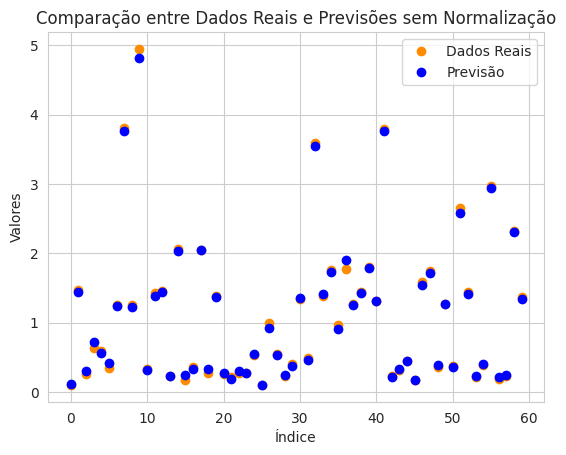

In [11]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, predict_train)
mse_test = mean_squared_error(y_test, predict_test)
print(f"Risco Empírico (MSE) Treinamento: {mse_train:.3f}")
print(f"Risco Empírico (MSE) Teste: {mse_test:.3f}")

sns.set_style("whitegrid")
plt.plot(y_test[:60].values, 'o', color="darkorange", label="Dados Reais")
plt.plot(predict_test[:60], 'o', color="blue", label="Previsão")
plt.xlabel("Índice")
plt.ylabel("Valores")
plt.title("Comparação entre Dados Reais e Previsões sem Normalização")
plt.legend()
plt.show()

# Dimensão VC

A **Dimensão VC** é uma métrica teórica que quantifica a capacidade de um modelo de aprendizado estatístico de se ajustar a diferentes conjuntos de dados. Ela é um indicador da complexidade do modelo, refletindo sua flexibilidade em aprender padrões a partir dos dados.

### O que é uma Dimensão VC Alta ou Baixa?

- **Dimensão VC Alta**:
    - **O que é**: Um modelo com uma Dimensão VC alta tem uma capacidade significativa de se ajustar aos dados.
    - **Vantagens**: Pode capturar padrões complexos e sutis nos dados.
    - **Desvantagens**: Risco de overfitting, onde o modelo aprende o ruído dos dados como se fosse um padrão legítimo.
    - **Exemplo**: Redes neurais profundas geralmente têm uma Dimensão VC alta.
  
- **Dimensão VC Baixa**:
    - **O que é**: Um modelo com uma Dimensão VC baixa tem capacidade limitada de se ajustar aos dados.
    - **Vantagens**: Menor risco de overfitting.
    - **Desvantagens**: Pode não ser capaz de capturar padrões mais complexos, levando ao underfitting.
    - **Exemplo**: Uma regressão linear tem uma Dimensão VC baixa.

### Como Balancear?
O objetivo é encontrar um equilíbrio, escolhendo um modelo com a Dimensão VC adequada para o problema específico, evitando tanto o overfitting quanto o underfitting.




In [12]:
# Dividindo o X_temp em três conjuntos de treinamento de tamanhos iguais
X_train1, X_temp, y_train1, y_temp = train_test_split(X_train, y_train, test_size=(2/3), random_state=42)
X_train2, X_train3, y_train2, y_train3 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_trains = [X_train1, X_train2, X_train3]
y_trains = [y_train1, y_train2, y_train3]

def train_model(X_train,y_train, X_val, y_val):
    model = create_l1_l2_model(input_shape)
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        verbose=1,
        mode='min'
    )
    model.fit(
        X_train, y_train,
        epochs=10,
        verbose=0,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping]
    )
    return model
# Treinando e avaliando modelos
for cont in range(3):
    model = train_model(X_trains[cont],y_trains[cont], X_val, y_val)

    train_error = mean_squared_error(y_trains[cont], model.predict(X_trains[cont]))
    test_error = mean_squared_error(y_test, model.predict(X_test))

    print(f"Subconjunto de treinamento {cont} (Tamanho {len(y_trains[cont])}):")
    print(f"Erro de treinamento: {train_error:.5f}")
    print(f"Erro de teste: {test_error:.5f}\n")

3363/3363 [==============================] - 7s 2ms/step
Subconjunto de treinamento 0 (Tamanho 51232):
Erro de treinamento: 0.00184
Erro de teste: 0.00183

3363/3363 [==============================] - 5s 1ms/step
Subconjunto de treinamento 1 (Tamanho 51232):
Erro de treinamento: 0.00208
Erro de teste: 0.00212

3363/3363 [==============================] - 5s 2ms/step
Subconjunto de treinamento 2 (Tamanho 51232):
Erro de treinamento: 0.00201
Erro de teste: 0.00197



## Consistência do Erro

- **Importância**: A consistência nos erros de treinamento e teste indica um alinhamento adequado entre a capacidade do modelo e a complexidade dos dados.
- **Exemplo**: Um modelo com alta Dimensão VC pode apresentar baixo erro de treinamento, mas alto erro de teste, sinalizando overfitting.

## Variação entre Subconjuntos

- **Relevância**: A variação nos erros entre diferentes subconjuntos reflete a influência dos dados específicos no treinamento.
- **Análise**: Uma variação não drasticamente diferente indica que o modelo é suficientemente flexível para se adaptar a diferentes subconjuntos de dados.
- **Exemplo**: Um modelo com baixa Dimensão VC pode apresentar grande variação nos erros, indicando sua incapacidade de se ajustar bem a variações nos dados.

## Relação com a Dimensão VC

- **Estimativa da Dimensão VC**: Usamos métricas como erro de treinamento e teste para ter uma ideia da Dimensão VC do modelo.
- **Análise dos Erros**:
  - **Overfitting**: Erros de treinamento baixos e erros de teste altos indicam uma Dimensão VC muito alta.
  - **Underfitting**: Erros de treinamento e teste altos indicam uma Dimensão VC muito baixa.
- **Conclusão**: O modelo deve ter uma capacidade adequada para os dados, com erros de treinamento e teste consistentes em diferentes subconjuntos.

## Conclusão

- **Avaliação Final**: A análise do risco estrutural e da Dimensão VC é crucial para entender e melhorar a performance do modelo.
- **Próximos Passos**: Experimentar com modelos de diferentes complexidades e observar a variação nos erros de treinamento e teste pode fornecer insights mais profundos sobre a Dimensão VC do modelo.

## Dilema Bias-Variance

O **Dilema Bias-Variance** é um problema fundamental no aprendizado de máquina, referindo-se ao trade-off entre o erro devido a suposições simplistas (bias) e o erro devido a excessiva sensibilidade aos dados de treinamento (variance).

# Bias e Variance:

- **Bias Alto**:
    - **O que é**: Erro devido a suposições simplistas sobre a forma do relacionamento entre as variáveis.
    - **Consequências**: Erro sistemático e consistente nos dados, levando a underfitting.
    - **Quando é Bom**: Quando sabemos que a relação entre as variáveis é de fato simples.
  
- **Variance Alta**:
    - **O que é**: Erro devido a excessiva sensibilidade aos dados de treinamento.
    - **Consequências**: O modelo se ajusta demais aos dados de treinamento, capturando o ruído como padrão, levando a overfitting.
    - **Quando é Bom**: Quando temos grandes volumes de dados e a complexidade real do problema é alta.

### Como Balancear?
O objetivo é minimizar tanto o bias quanto a variance para construir um modelo robusto e confiável que performe bem em dados não vistos, encontrando um ponto de equilíbrio que minimize o erro total.

3363/3363 [==============================] - 5s 2ms/step


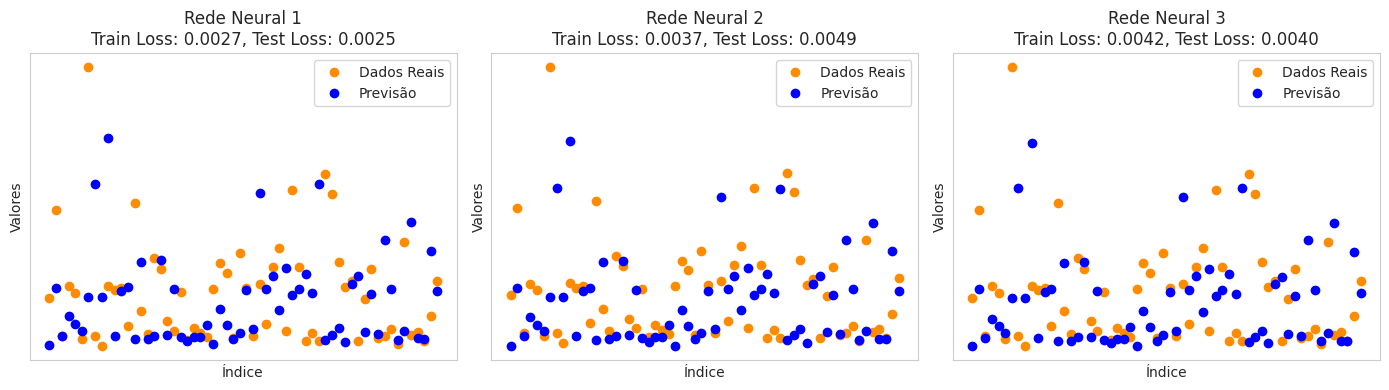

In [13]:
# Função para plotar os resultados
def plot_results_nn(model, title, subplot, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    train_loss = history.history['loss'][-1]  # Pega o último loss de treinamento
    predict = model.predict(X_test)
    test_loss = model.evaluate(X_test, y_test, verbose=0)  # Calcula o loss de teste
    ax = plt.subplot(subplot)
    plt.setp(ax, xticks=(), yticks=())
    sns.set_style("whitegrid")
    plt.plot(y_train[:60].values, 'o', color="darkorange", label="Dados Reais")
    plt.plot(predict[:60], 'o', color="blue", label="Previsão")
    plt.xlabel("Índice")
    plt.ylabel("Valores")
    # Adiciona o loss de treino e teste ao título
    plt.title(f"{title}\nTrain Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    plt.legend()


model_1 = Sequential()
model_1.add(Dense(1, activation='linear',  input_shape=(input_shape,)))  # Camada de entrada e única camada oculta
model_1.compile(optimizer='adam', loss='mse')

model_2 = Sequential()
model_2.add(Dense(50, activation='relu',  input_shape=(input_shape,)))  # Camada de entrada
model_2.add(Dense(30, activation='relu'))
model_2.add(Dense(30, activation='relu'))
model_2.add(Dense(1, activation='linear'))
model_2.compile(optimizer='adam', loss='mse')

model_3 = Sequential()
model_3.add(Dense(128, activation='relu',  input_shape=(input_shape,)))  # Camada de entrada
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1, activation='linear'))
model_3.compile(optimizer='adam', loss='mse')

# Plotando os resultados
plt.figure(figsize=(14, 4))

# Passe X_train, y_train, X_test e y_test como argumentos adicionais para plot_results_nn
plot_results_nn(model_1, "Rede Neural 1", 131, X_train, y_train, X_test, y_test)
plot_results_nn(model_2, "Rede Neural 2", 132, X_train, y_train, X_test, y_test)
plot_results_nn(model_3, "Rede Neural 3", 133, X_train, y_train, X_test, y_test)

plt.tight_layout()
plt.show()


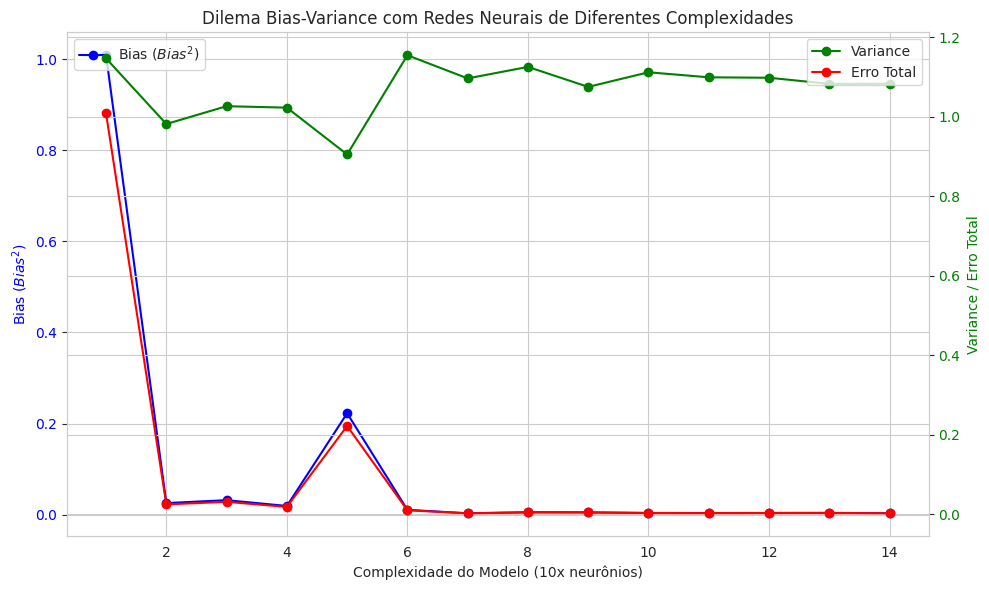

In [14]:
from IPython.display import clear_output
import numpy as np

# Função para calcular bias, variance e erro total
def calculate_bias_variance(models, X_train, X_test, y_train, y_test):
    biases, variances, errors = [], [], []
    for model in models:
        model.fit(X_train, y_train, epochs=20, verbose=0)  # Treinando cada modelo
        predictions = model.predict(X_test).flatten()  # Previsões do modelo

        # Calculando bias, variance e erro total
        bias = np.mean((predictions - y_test.values.flatten()) ** 2)
        variance = np.var(predictions)
        error = mean_squared_error(y_test.values.flatten(), predictions)

        biases.append(bias)
        variances.append(variance)
        errors.append(error)
    return biases, variances, errors

# Criando modelos de redes neurais correspondentes a diferentes "complexidades"
models = []
for cont in range(1, 15):
    model = Sequential()
    model.add(Dense(10*cont , activation='relu',input_shape=(X_train.shape[1],)))   # Camada de entrada e oculta, aumentando neurônios conforme o loop
    model.add(Dense(1, activation='linear'))  # Camada de saída
    model.compile(optimizer='adam', loss='mse')
    models.append(model)

biases, variances, errors = calculate_bias_variance(models, X_train[:2500], X_test, y_train[:2500], y_test)
clear_output(wait=True)

plt.figure(figsize=(10, 6))

# Criando um eixo para bias
ax1 = plt.gca()
ax1.plot(range(1, 15), biases, label='Bias ($Bias^2$)', marker='o', color='blue')
ax1.set_xlabel('Complexidade do Modelo (10x neurônios)')
ax1.set_ylabel('Bias ($Bias^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo para variância e erro total
ax2 = ax1.twinx()
ax2.plot(range(1, 15), variances, label='Variance', marker='o', color='green')
ax2.plot(range(1, 15), errors, label='Erro Total', marker='o', color='red')
ax2.set_ylabel('Variance / Erro Total', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Dilema Bias-Variance com Redes Neurais de Diferentes Complexidades')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# À medida que a complexidade do modelo (número de neurônios) aumenta, o bias tende a diminuir, mas a variância tede a aumentar.
# O erro total tem um ponto de mínimo, onde a combinação de bias e variância é ótima.

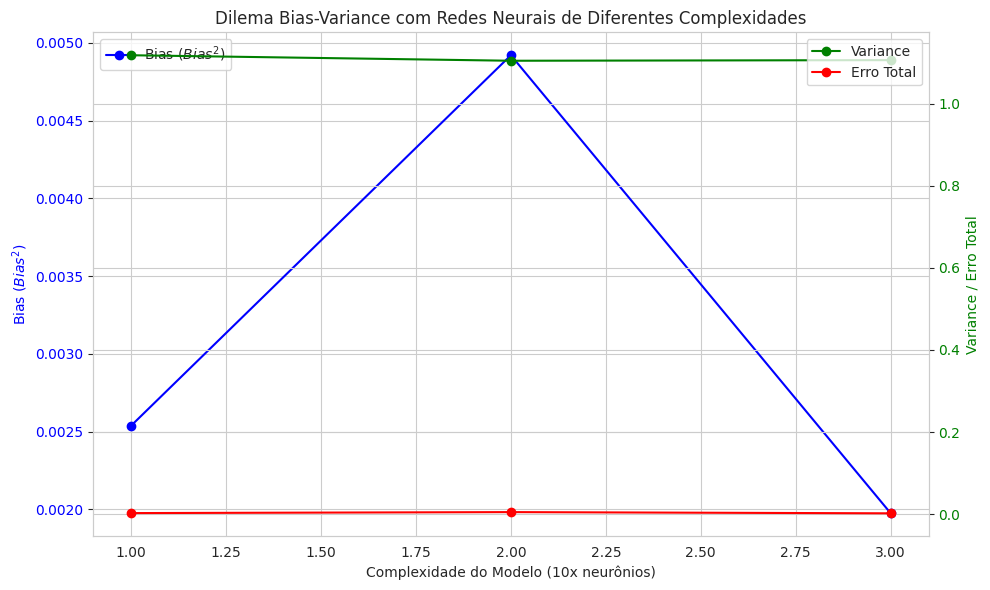

In [15]:
from IPython.display import clear_output
import numpy as np
# Função para calcular bias, variance e erro total
def calculate_bias_variance(models, X_test, y_test):
    biases, variances, errors = [], [], []
    for model in models:
        predictions = model.predict(X_test).flatten()  # Previsões do modelo

        # Calculando bias, variance e erro total
        bias = np.mean((predictions - y_test.values.flatten()) ** 2)
        variance = np.var(predictions)
        error = mean_squared_error(y_test.values.flatten(), predictions)

        biases.append(bias)
        variances.append(variance)
        errors.append(error)
    return biases, variances, errors


# Criando modelos de redes neurais correspondentes a diferentes "complexidades"
models = [model_1, model_2, model_3]

biases, variances, errors = calculate_bias_variance(models, X_test, y_test)
clear_output(wait=True)

plt.figure(figsize=(10, 6))

# Criando um eixo para bias
ax1 = plt.gca()
ax1.plot(range(1, 4), biases, label='Bias ($Bias^2$)', marker='o', color='blue')
ax1.set_xlabel('Complexidade do Modelo (10x neurônios)')
ax1.set_ylabel('Bias ($Bias^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo para variância e erro total
ax2 = ax1.twinx()
ax2.plot(range(1, 4), variances, label='Variance', marker='o', color='green')
ax2.plot(range(1, 4), errors, label='Erro Total', marker='o', color='red')
ax2.set_ylabel('Variance / Erro Total', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Dilema Bias-Variance com Redes Neurais de Diferentes Complexidades')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()